<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>


## <o>Day 09</o>: <m>(__Num 4 ML__)</m>

> <c>Constrained optimization</c> 
##### <m> Problem </m>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patheffects
from scipy import optimize as OPT
%matplotlib inline

![Alt text](image.png)

In [2]:
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der


def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

def Consts(x,cons=None):
    match cons:
        case "1":
            return  sum(1-x[:-1] + 2 *x[1:])
        case "2":
            return 1 - sum(x[:-1]**2.0 + x[1:])
        case "3":
            return 1 - sum(x[:-1]**2.0 - x[1:])
        case "4":
            return 1 - sum(2*x[:-1] + x[1:])
        case "5":
            cond = np.nonzero((x[:-1]<=1) & (x[:-1]>=0))[1]
            y = np.zeros_like(x)
            y[:-1,cond] = x[:-1,cond]
            return y[:-1]
        case "6":
            cond = np.nonzero((x[1:]<=2.0) & (x[1:]>=-0.5))[1]
            y = np.zeros_like(x)
            y[1:,cond] = x[1:,cond]
            return y[1:]


<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

### <m> The Feasable space of Constrainted Rosenbrock function </m>

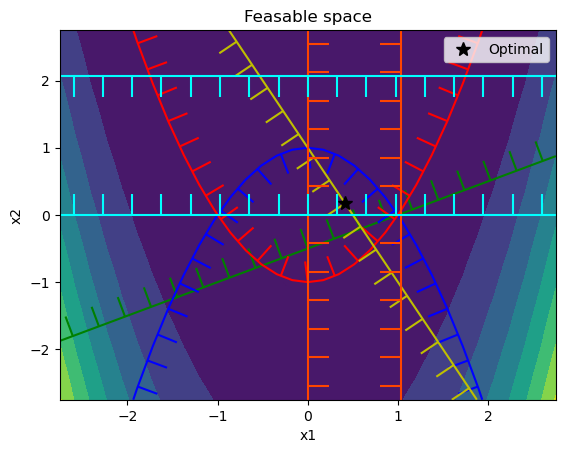

In [14]:
M = 33
X,Y = np.meshgrid(np.linspace(-2.75,2.75,num=M),np.linspace(-2.75,2.75,num=M))
Points = np.vstack((X.flatten(),Y.flatten()))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.contourf(X,Y,rosen(Points).reshape(X.shape),cmap='viridis')
C1 = ax.contour(X,Y,Consts(Points,cons="1").reshape(X.shape),[0],colors='g')
C1.set(path_effects=[patheffects.withTickedStroke(angle=90,length=0.75,spacing=20)])
C2 = ax.contour(X,Y,Consts(Points,cons="2").reshape(X.shape),[0],colors='b')
C2.set(path_effects=[patheffects.withTickedStroke(angle=90,length=0.75,spacing=20)])
C3 = ax.contour(X,Y,Consts(Points,cons="3").reshape(X.shape),[0],colors='r')
C3.set(path_effects=[patheffects.withTickedStroke(angle=90,length=0.75,spacing=20)])
C4 = ax.contour(X,Y,Consts(Points,cons="4").reshape(X.shape),[0],colors="y")
C4.set(path_effects=[patheffects.withTickedStroke(angle=90,length=0.75,spacing=20)])
C5 = ax.contour(X,Y,Consts(Points,cons="5").reshape(X.shape),[0],colors="orangered")
C5.set(path_effects=[patheffects.withTickedStroke(angle=90,length=0.75,spacing=20)])
C6 = ax.contour(X,Y,Consts(Points,cons="6").reshape(X.shape),[0],colors="cyan")
C6.set(path_effects=[patheffects.withTickedStroke(angle=90,length=0.75,spacing=20)])
ax.plot(0.4149,0.1701,'k*',ms=10.0,label="Optimal")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Feasable space")
ax.legend()
plt.show()

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

### <m> Using Scipy.Minimize </m>

>> Generally think as 
$$\begin{align*}
\underset{x}{min} f(x)\\
\text{s.t:}\,\,\,\, c^l \leq c(x) \leq c^u,\\
x^l \leq x \leq x^u.
\end{align*}$$

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

### <o> Trust-Region Constrained Method </o>

In [4]:
# Conditions
bounds = OPT.Bounds(lb=[0,-0.5],ub=[1.0,2.0])
LinConst = OPT.LinearConstraint([[1,2],[2,1]],[-np.inf,1],[1,1])
def Const(x):
    return [x[0]**2 + x[1],x[0]**2 - x[1]]
def J_Const(x):
    return [[2*x[0],1],[2*x[0],-1]]
def H_Const(x,v):
    return v[0]*np.array([[2,0],[0,0]]) + v[1]*np.array([[2,0],[0,0]])

NLConst = OPT.NonlinearConstraint(Const,-np.inf,1,jac=J_Const,hess=H_Const) 

In [5]:
init = np.array([-5,-5])
result = OPT.minimize(rosen,init,method='trust-constr',jac=rosen_der,hess=rosen_hess,constraints=[LinConst,NLConst],options={'verbose':1},bounds=bounds)
print(result)

`gtol` termination condition is satisfied.
Number of iterations: 20, function evaluations: 16, CG iterations: 15, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.061 s.
           message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: 0.3427175756422306
                 x: [ 4.149e-01  1.701e-01]
               nit: 20
              nfev: 16
              njev: 16
              nhev: 16
          cg_niter: 15
      cg_stop_cond: 1
              grad: [-8.265e-01 -4.140e-01]
   lagrangian_grad: [ 1.495e-09 -2.990e-09]
            constr: [array([ 7.552e-01,  1.000e+00]), array([ 3.423e-01,  2.070e-03]), array([ 4.149e-01,  1.701e-01])]
               jac: [array([[ 1.000e+00,  2.000e+00],
                           [ 2.000e+00,  1.000e+00]]), array([[ 8.299e-01,  1.000e+00],
                           [ 8.299e-01, -1.000e+00]]), array([[ 1.000e+00,  0.000e+00],
                           [ 0.000e+00,

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

### <o>Another method to calculate Hessian</o>

In [6]:
NLConst2 = OPT.NonlinearConstraint(Const,-np.inf,1,jac=J_Const,hess=OPT.BFGS())

init = np.array([-5,-5])
result = OPT.minimize(rosen,init,method='trust-constr',jac=rosen_der,hess=rosen_hess,constraints=[LinConst,NLConst2],options={'verbose':1},bounds=bounds)
print(result)

`gtol` termination condition is satisfied.
Number of iterations: 21, function evaluations: 17, CG iterations: 16, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.065 s.
           message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: 0.3427175756422305
                 x: [ 4.149e-01  1.701e-01]
               nit: 21
              nfev: 17
              njev: 17
              nhev: 17
          cg_niter: 16
      cg_stop_cond: 1
              grad: [-8.265e-01 -4.140e-01]
   lagrangian_grad: [ 1.495e-09 -2.990e-09]
            constr: [array([ 7.552e-01,  1.000e+00]), array([ 3.423e-01,  2.070e-03]), array([ 4.149e-01,  1.701e-01])]
               jac: [array([[ 1.000e+00,  2.000e+00],
                           [ 2.000e+00,  1.000e+00]]), array([[ 8.299e-01,  1.000e+00],
                           [ 8.299e-01, -1.000e+00]]), array([[ 1.000e+00,  0.000e+00],
                           [ 0.000e+00,

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

### <o>Another Jacobian approaches</o>

In [7]:
## Jacobian methods = '2-point','3-point','cs'
NLConst3 = OPT.NonlinearConstraint(Const,-np.inf,1,jac='cs',hess=OPT.BFGS())

init = np.array([-5,-5])
result = OPT.minimize(rosen,init,method='trust-constr',jac=rosen_der,hess=rosen_hess,constraints=[LinConst,NLConst3],options={'verbose':1},bounds=bounds)
print(result)

`gtol` termination condition is satisfied.
Number of iterations: 21, function evaluations: 17, CG iterations: 16, optimality: 2.99e-09, constraint violation: 0.00e+00, execution time: 0.063 s.
           message: `gtol` termination condition is satisfied.
           success: True
            status: 1
               fun: 0.3427175756422305
                 x: [ 4.149e-01  1.701e-01]
               nit: 21
              nfev: 17
              njev: 17
              nhev: 17
          cg_niter: 16
      cg_stop_cond: 1
              grad: [-8.265e-01 -4.140e-01]
   lagrangian_grad: [ 1.495e-09 -2.990e-09]
            constr: [array([ 7.552e-01,  1.000e+00]), array([ 3.423e-01,  2.070e-03]), array([ 4.149e-01,  1.701e-01])]
               jac: [array([[ 1.000e+00,  2.000e+00],
                           [ 2.000e+00,  1.000e+00]]), array([[ 8.299e-01,  1.000e+00],
                           [ 8.299e-01, -1.000e+00]]), array([[ 1.000e+00,  0.000e+00],
                           [ 0.000e+00,

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

### <o> Sequential Least Squares Programming </o>

In [8]:
## SLSQP
init = np.array([-5,-5])
result = OPT.minimize(rosen,init,method='SLSQP',jac=rosen_der,constraints=[LinConst,NLConst3],options={'verbose':1},bounds=bounds)
print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.3427175756811355
       x: [ 4.149e-01  1.701e-01]
     nit: 6
     jac: [-8.265e-01 -4.141e-01]
    nfev: 6
    njev: 6


/usr/lib/python3.11/site-packages/scipy/optimize/_constraints.py:537: OptimizeWarning: Equality and inequality constraints are specified in the same element of the constraint list. For efficient use with this method, equality and inequality constraints should be specified in separate elements of the constraint list. 
  warn("Equality and inequality constraints are specified in the same "
/tmp/ipykernel_32893/3044376730.py:3: OptimizeWarning: Unknown solver options: verbose
  result = OPT.minimize(rosen,init,method='SLSQP',jac=rosen_der,constraints=[LinConst,NLConst3],options={'verbose':1},bounds=bounds)


<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

### <o> Additional Line Search Methods </o>
> <m> Binary Search </m>

In [9]:

def binary_search_line_search(f, df, x0, alpha_start, tol=1e-5, max_iter=100):
    lower, upper = 0, alpha_start
    for i in range(max_iter):
        alpha = (lower + upper) / 2.0
        phi_alpha = f(x0 - alpha * df(x0))
        if np.abs(df(x0 - alpha * df(x0))) < tol:
            return alpha
        elif df(x0 - alpha * df(x0)) > 0:
            upper = alpha
        else:
            lower = alpha
    return alpha

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>
> <m> Golden Section Search </m>

In [10]:
def golden_section_search(f, a, b, tol=1e-5):
    invphi = (np.sqrt(5) - 1) / 2  # 1/phi
    invphi2 = (3 - np.sqrt(5)) / 2  # 1/phi^2
    c = a + invphi2 * (b - a)
    d = a + invphi * (b - a)
    while abs(c - d) > tol:
        if f(c) < f(d):
            b = d
        else:
            a = c
        c = a + invphi2 * (b - a)
        d = a + invphi * (b - a)
    return (b + a) / 2

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>
> <m> Armijio Search </m>

In [11]:
def armijo_line_search(f, df, x0, alpha=1.0, beta=0.5, c=1e-4):
    while f(x0 - alpha * df(x0)) > f(x0) - c * alpha * np.dot(df(x0), df(x0)):
        alpha *= beta
    return alpha

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>
> <m> Wolfe condition cheking </m>

In [12]:
def check_wolfe_conditions(f, df, x, p, alpha, c1=1e-4, c2=0.9):
    phi_0 = f(x)
    phi_alpha = f(x + alpha * p)
    phi_0_grad = np.dot(df(x), p)
    phi_alpha_grad = np.dot(df(x + alpha * p), p)
    
    armijo = phi_alpha <= phi_0 + c1 * alpha * phi_0_grad
    curvature = phi_alpha_grad >= c2 * phi_0_grad
    
    return armijo and curvature

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>
 <c> Example for Line search methods </c>

In [15]:
def quadratic_function(x):
    return x**2 + 2*x + 1

def quadratic_function_derivative(x):
    return 2*x + 2

x0 = np.array([-2.0])  # Starting point

binary_alpha = binary_search_line_search(quadratic_function, quadratic_function_derivative, x0, alpha_start=1.0)
print(f"Binary search alpha: {binary_alpha}")

golden_alpha = golden_section_search(quadratic_function, a=0, b=2)
print(f"Golden section alpha: {golden_alpha}")


armijo_alpha = armijo_line_search(quadratic_function, quadratic_function_derivative, x0)
print(f"Armijo alpha: {armijo_alpha}")

p = -quadratic_function_derivative(x0)
wolfe_check = check_wolfe_conditions(quadratic_function, quadratic_function_derivative, x0, p, binary_alpha)
print(f"Wolfe conditions met: {wolfe_check}")

Binary search alpha: 0.5
Golden section alpha: 1.560573666499888e-05
Armijo alpha: 0.5
Wolfe conditions met: True
